Setup for packages and loading the data.

The dataset is a csv file, for each named file there's 24 columns: a label which can be 1 or 2 (1 for SSP, 2 for star) and 23 colour index. 

The data was queried from J-PLUS DR1 database and tidied up to remove duplicates and rows with null values for magnitudes. Then magnitudes were converted to colour index with rSDSS as reference, and objects with probability of being star less than 1. were dropped. This objects were classified as label 2. Additional data was acquired via magnitude convolution for SSPs and classified as label 1.

The notebook renames each label SSP (1) or star (2) for running the algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import graphviz

%matplotlib inline

sns.set_theme()

fname = "./catalog/fulldata.csv"
jplusColours = pd.read_csv(fname, index_col='id')

jplusColours.label.replace([1, 2], ["ssp","star"], inplace=True)

The functions run the models, splitting the data into a X[n_size,n_features] dataframe and y[n_size] label dataframe. Then, each is sampled into two sets for training and splitting, with a test sample of 0.4.

In [2]:
def decTree(dataset, features):
    X = dataset[features]
    y = dataset["label"]
    
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, random_state = 0)
    
    print("Running Decision Tree")
    model = DecisionTreeClassifier()
    model.fit(xtrain, ytrain)
    
    print("Depth of the Decision Tree: ", model.get_depth())
    
    predictTrain = model.predict(xtrain)
    accTrain = accuracy_score(ytrain, predictTrain)
    print("Accuracy on training: ", accTrain)
    
    predictTest = model.predict(xtest)
    accTest = accuracy_score(ytest, predictTest)
    print("Accuracy on test: ", accTest)
    
    return model

def forest(dataset, features):
    
    X = dataset[features]
    y = dataset["label"]
    
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, random_state = 0)
    print("Running Random Forest")
    model = RandomForestClassifier()
    model.fit(xtrain, ytrain)
    
    print("# of trees: ", model.n_estimators)
    
    predictTrain = model.predict(xtrain)
    accTrain = accuracy_score(ytrain, predictTrain)
    print("Accuracy on training: ", accTrain)
    
    predictTest = model.predict(xtest)
    accTest = accuracy_score(ytest, predictTest)
    print("Accuracy on test: ", accTest)
    
    return model

We first run the algorithms for the whole data.

Running Decision Tree
Depth of the Decision Tree:  1
Accuracy on training:  1.0
Accuracy on test:  1.0
Running Random Forest
# of trees:  100
Accuracy on training:  1.0
Accuracy on test:  1.0


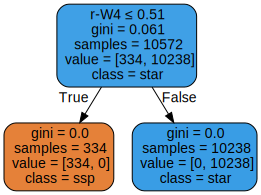

In [3]:
features = list(jplusColours.columns[1:])

treeModel = decTree(jplusColours, features)
forestModel = forest(jplusColours, features)

dot_data = export_graphviz(treeModel, out_file=None,
                           feature_names=features,
                           class_names=["ssp", "star"],
                           filled=True, rounded=True,
                           special_characters=True)
graphviz.Source(dot_data)

Now running with JPLUS+2MASS colours as features.

Running Decision Tree
Depth of the Decision Tree:  6
Accuracy on training:  1.0
Accuracy on test:  0.9991488154348135
Running Random Forest
# of trees:  100
Accuracy on training:  1.0
Accuracy on test:  0.9997162718116045


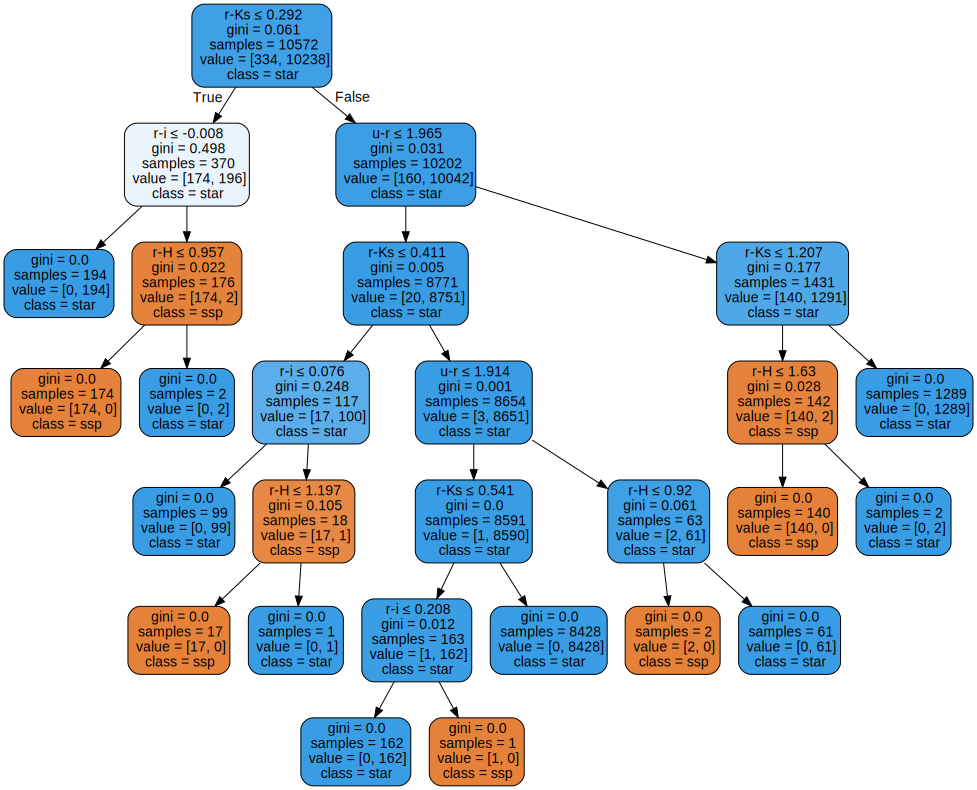

In [4]:
features = ['u-r', 'J378-r', 'J395-r', 'J410-r', 'J430-r', 'g-r', 'J515-r', 'r-J660', 'r-i', 'r-J861', 'r-z', 'r-J', 'r-H', 'r-Ks']

treeModel = decTree(jplusColours, features)
forestModel = forest(jplusColours, features)

dot_data = export_graphviz(treeModel, out_file=None,
                           feature_names=features,
                           class_names=["ssp", "star"],
                           filled=True, rounded=True,
                           special_characters=True)
graphviz.Source(dot_data)

Next feature sample is only JPLUS colours.

Running Decision Tree
Depth of the Decision Tree:  12
Accuracy on training:  1.0
Accuracy on test:  0.9920556107249255
Running Random Forest
# of trees:  100
Accuracy on training:  1.0
Accuracy on test:  0.997020854021847


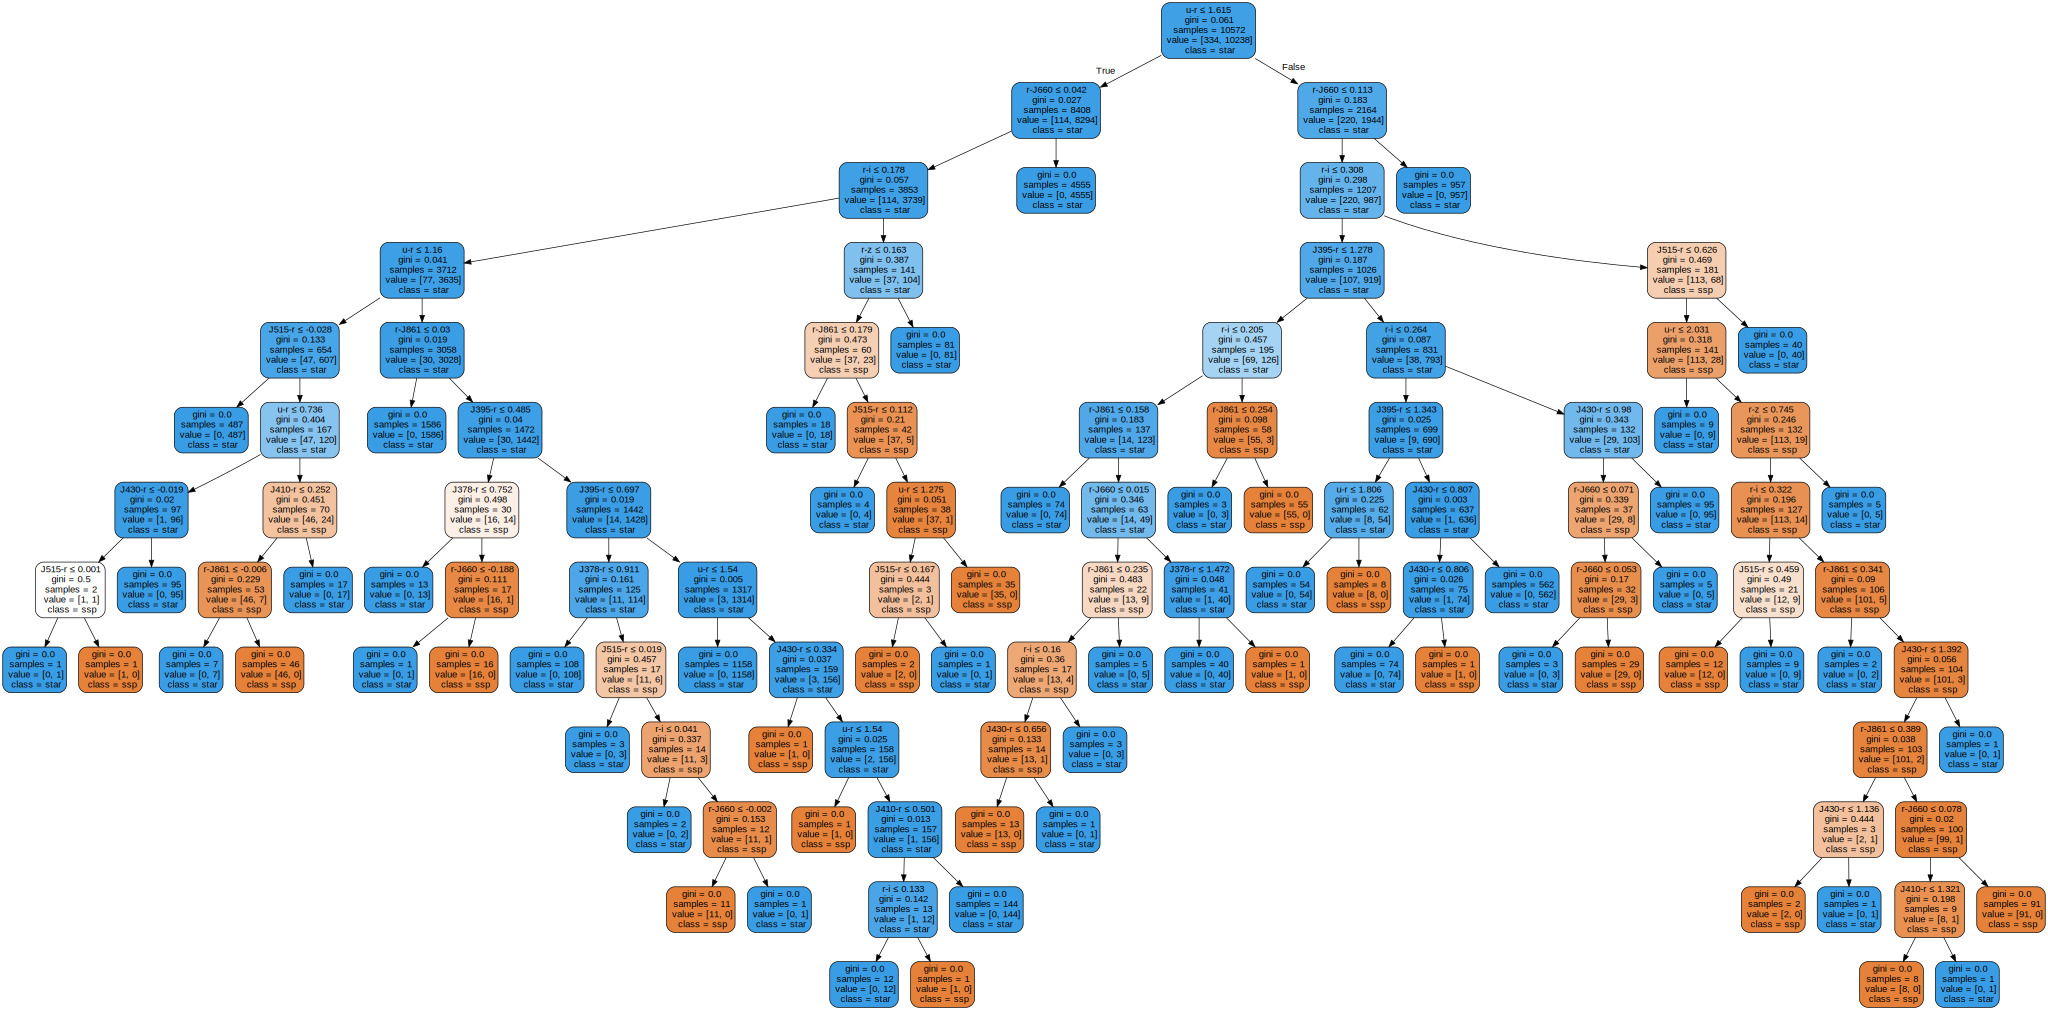

In [5]:
features = ['u-r', 'J378-r', 'J395-r', 'J410-r', 'J430-r', 'g-r', 'J515-r', 'r-J660', 'r-i', 'r-J861', 'r-z']

treeModel = decTree(jplusColours, features)
forestModel = forest(jplusColours, features)

dot_data = export_graphviz(treeModel, out_file=None,
                           feature_names=features,
                           class_names=["ssp", "star"],
                           filled=True, rounded=True,
                           special_characters=True)
graphviz.Source(dot_data)

Running Decision Tree
Depth of the Decision Tree:  14
Accuracy on training:  1.0
Accuracy on test:  0.9936319718928415
Running Random Forest
# of trees:  100
Accuracy on training:  1.0
Accuracy on test:  0.997364953886693


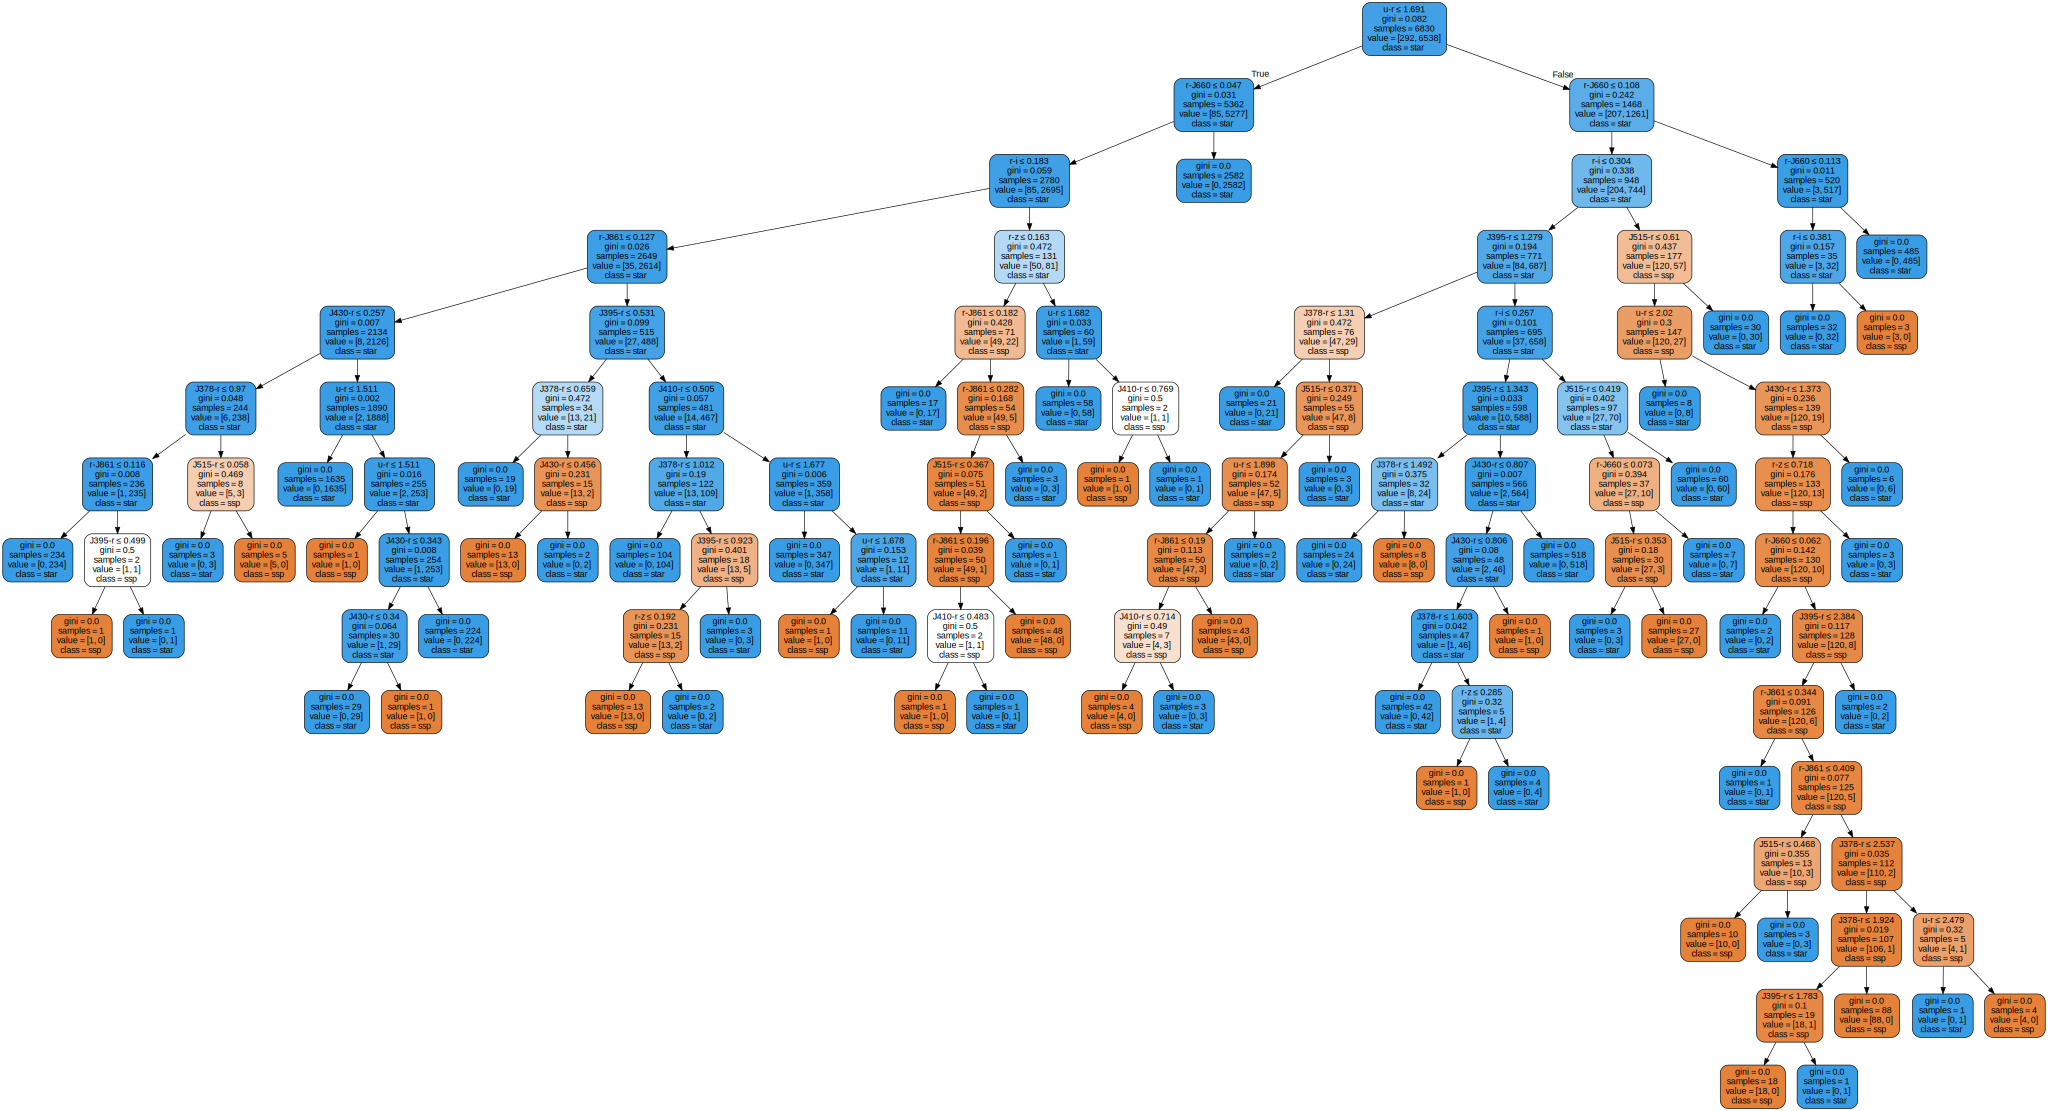

In [6]:
jplusCut = jplusColours[(jplusColours["g-r"] > 0.1) & (jplusColours["g-r"] < 1.0)]

treeModel = decTree(jplusCut, features)
forestModel = forest(jplusCut, features)

dot_data = export_graphviz(treeModel, out_file=None,
                           feature_names=features,
                           class_names=["ssp", "star"],
                           filled=True, rounded=True,
                           special_characters=True)
graphviz.Source(dot_data)

Plotting

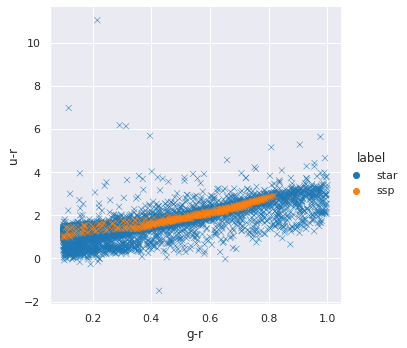

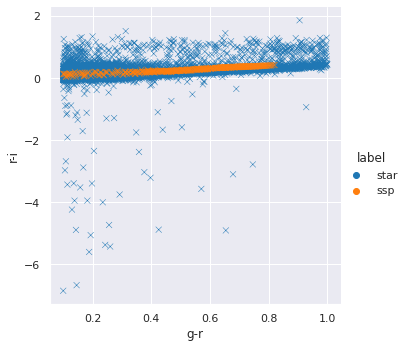

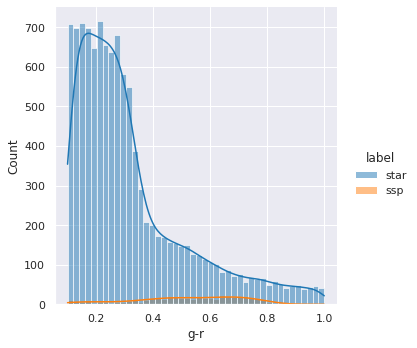

In [7]:
sns.relplot(
    data=jplusCut,
    x="g-r", y="u-r", hue="label",
    palette="tab10", marker="x"
)
sns.relplot(
    data=jplusCut,
    x="g-r", y="r-i", hue="label",
    palette="tab10", marker="x"
)
sns.displot(
    data=jplusCut,
    x="g-r",hue="label",
    palette="tab10", kde=True
)

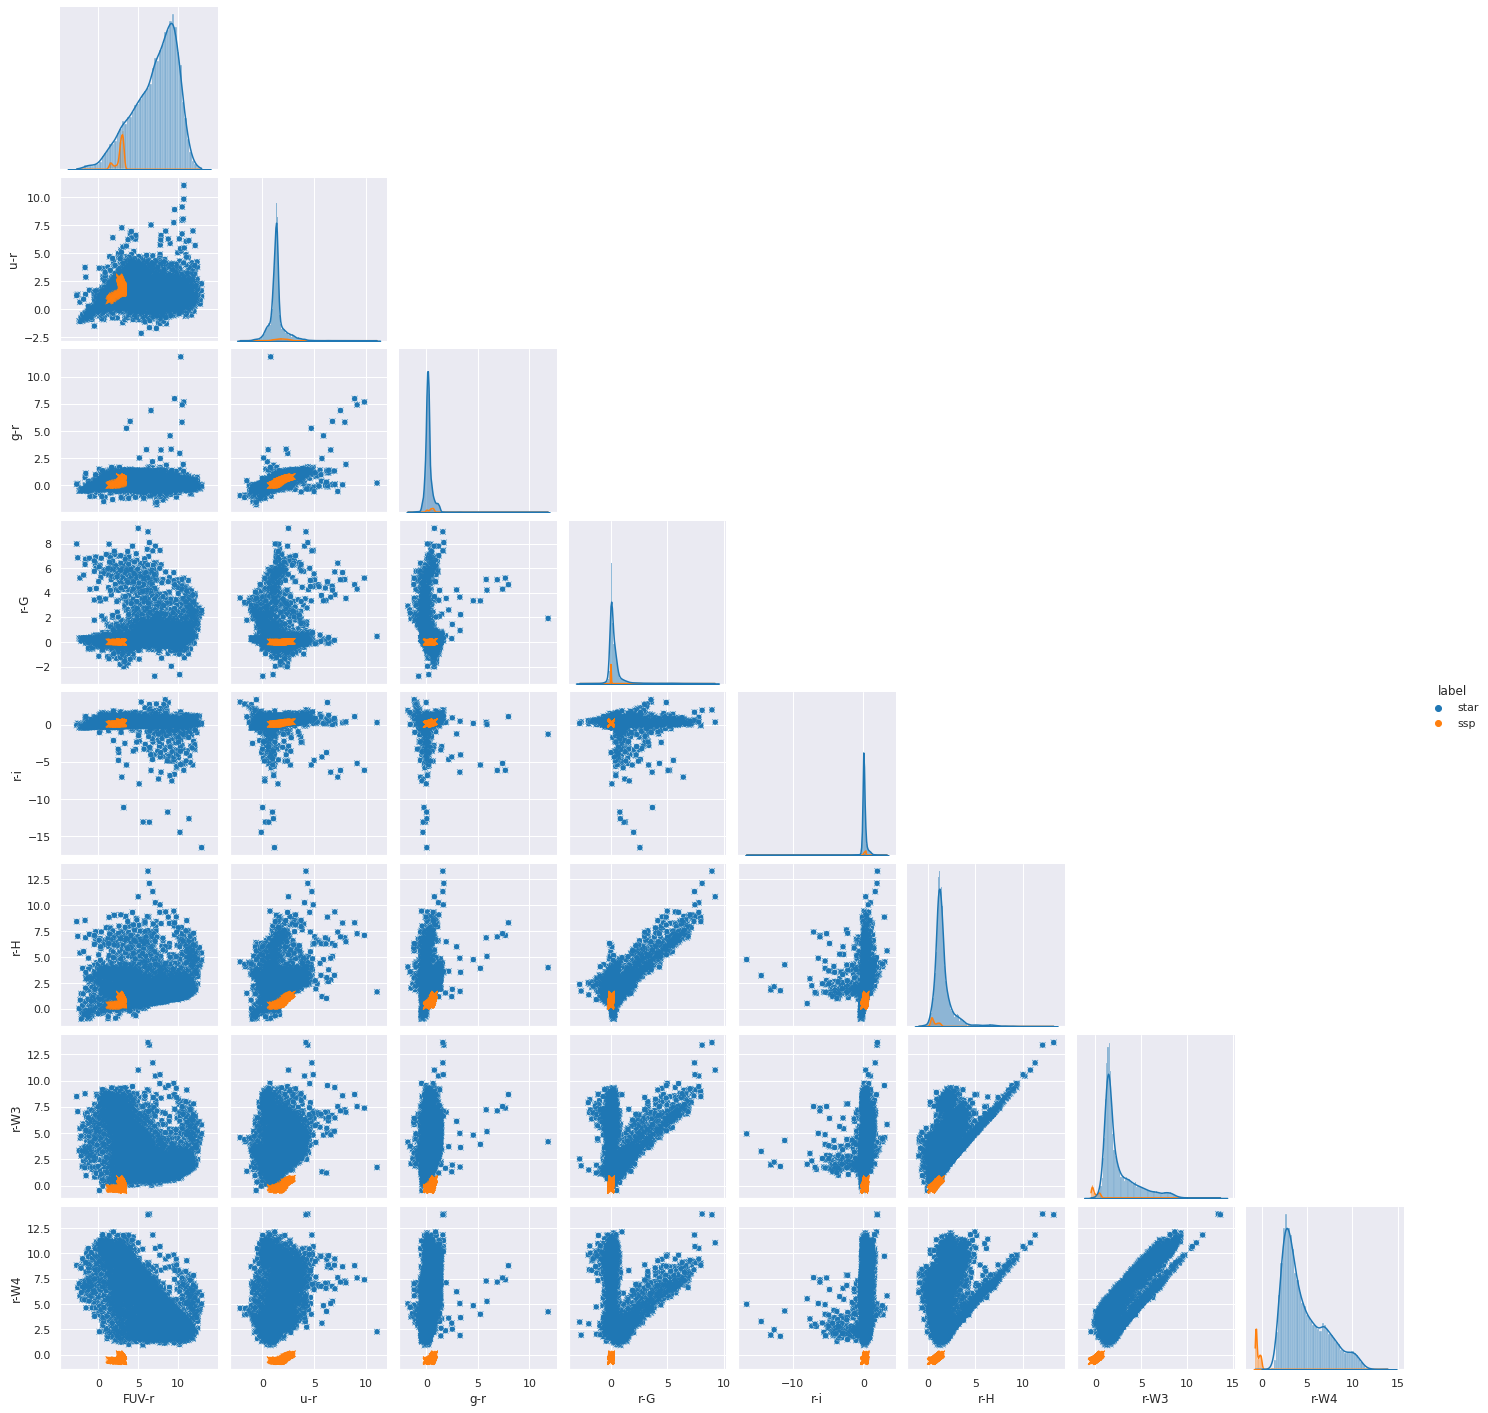

In [8]:
subdata =['FUV-r', 'u-r', 'g-r', 'r-G','r-i', 'r-H', 'r-W3', 'r-W4']

g = sns.pairplot(
    data = jplusColours,
    x_vars=subdata,
    y_vars=subdata,
    hue="label", palette="tab10", 
    corner=True)
g.map_lower(sns.scatterplot, marker="x")
#g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_diag(sns.histplot, kde=True)

In [ ]:
#sns.displot(data=jplusColours, x = 'u-r', hue="label", kind="kde", fill=True)

g = sns.pairplot(
    data = jplusCut,
    x_vars=features,
    y_vars=features,
    hue="label", palette="tab10", 
    corner=True)
g.map_lower(sns.scatterplot, marker="x")
g.map_diag(sns.histplot, kde=True)